# Исследование данных о российском кинопрокате

#### Постановка задачи

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

Мы будум работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

#### Цель:<br>

Ответить на вопрос насколько интересны зрителю фильмы с государственной поддержкой.

#### План работы:<br>
* загрузить данные и посмотреть общую информацию.
* обработать пропущенные значения, привести столбцы к нужному типу данных обработать дубликаты.
* добавить новые столбцы, необходимые для анализа.
* провести исследовательский анализ данных.

#### Описание данных

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. <br>
* `title` — название фильма<br>
* `puNumber` — номер прокатного удостоверения<br>
* `show_start_date` — дата премьеры фильма<br>
* `type` — тип фильма<br>
* `film_studio` — студия-производитель<br>
* `production_country` — страна-производитель<br>
* `director` — режиссёр<br>
* `producer` — продюсер<br>
* `age_restriction`— возрастная категория<br>
* `refundable_support`— объём возвратных средств государственной поддержки<br>
* `nonrefundable_support`— объём невозвратных средств государственной поддержки<br>
* `financing_source`— источник государственного финансирования<br>
* `budget`— общий бюджет фильма. Уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. <br>
* `ratings`— рейтинг фильма на КиноПоиске<br>
* `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


sns.set(rc={'figure.figsize':(16, 9)})
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 50)

### Откроем файлы с данными и объединим их в один датафрейм. 

In [2]:
movies = pd.read_csv('data/mkrf_movies.csv')
shows = pd.read_csv('data/mkrf_shows.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Попытка объединения таблиц привела к ошибке.

In [4]:
movies.puNumber.dtype, shows.puNumber.dtype

(dtype('O'), dtype('int64'))

**Мы видим, что в одной таблице столбец `puNumber` имеет тип данных `object`, а в другой `int`, давайте исправим эту ситуацию.**

In [5]:
movies.puNumber = pd.to_numeric(movies.puNumber, errors='coerce')

In [6]:
movies[movies.puNumber.isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**У нас появилось одно пропущенное значение в столбце `puNumber`, давайте его удалим и тогда у нас получится привести этот столбец к типу `int`.**

In [7]:
movies.dropna(subset=['puNumber'], axis=0, inplace=True)
movies.puNumber = movies.puNumber.astype('int')

In [8]:
movies.puNumber.dtype, shows.puNumber.dtype

(dtype('int32'), dtype('int64'))

**Посмотрим есть ли дубликаты в столбце `puNumber`.**

In [9]:
movies[movies.puNumber.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


In [10]:
shows[shows.puNumber.duplicated()]

,puNumber,box_office


**Заменим значение прокатного номера, в строке с индексом - 5068, на максимальный прокатный номер + 1, но перед этим проверим есть ли такой номер в табличке `shows`.**

In [11]:
shows[shows.puNumber == movies.puNumber.max() + 1]

,puNumber,box_office


In [12]:
movies.loc[5068, 'puNumber'] = movies.puNumber.max() + 1

**И наконец объеденим наши таблицы.**

In [13]:
data = movies.merge(shows, how='left', on='puNumber')

#### Вывод:<br>
**Столбец по которому мы хотели объединить наши таблицы содержал значение 'нет' поэтому мы не могли привести его к типу int. После удаление этой строчки у нас получилось кастовать этот столбец, и объединить таблицы.**

### Предобработка данных

#### Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

**Посмотрим на наши данные**

In [14]:
data.sample(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3587,Скандинавский форсаж: Гонки на льду,121000317,2017-01-16T12:00:00.000Z,Художественный,Филмкамератене А/С 2014,Норвегия,Халлвард Браэин,"Маркус Б.Бродерсен, Джон М.Якобсен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.6,"боевик,комедия",161086.00
1620,Золото (Gold),121021813,2013-08-07T12:00:00.000Z,Художественный,"Шрам Фильм Кернер и Вебер, А Эр Дэ, Арт, Байри...",Германия - Канада,Томас Арслан,"Михаэль Вебер, Флориан Кернер фон Густорф",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"триллер,драма,приключения",NaN
2118,Простушка,121001915,2015-02-11T12:00:00.000Z,Художественный,"Си Би Эс Филмз, Васт Интертейнмент, Вандерлэнд...",США,Эри Сандел,"Мэри Виола, МакДжи, Сьюзан Картсонис",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"комедия,мелодрама",10682215.90
6160,После Лета,112006718,2018-09-01T12:00:00.000Z,Документальный,"ООО ""Хайпфилм""",Россия,К.Серебренников,"И.Стюарт, П.Буря, М.Осман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"ужасы,боевик,триллер",872839.50
2434,Оставленные,121021714,2014-09-25T12:00:00.000Z,Художественный,Стон Лайк Интертейнмент,США,Вик Армстронг,"Эд Клайдсдэйл, Пол Лалонд, Майкл Уокер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.8,"фэнтези,драма,детектив",NaN
5170,Задание,121012111,2011-07-08T12:00:00.000Z,Художественный,Афтер Дарк Филмз,США,Алекс Оруэлл,"Кортни Соломон, Стефани Калеб, Лоурен Ито",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.9,ужасы,NaN
7068,Код Гиас: Лелуш Воскресший,124005219,2019-07-18T12:00:00.000Z,Анимационный,Санрайс,Япония,Танигути Горо,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,"аниме,мультфильм,боевик",5422352.53
1675,Сэлинджер,126003013,2013-09-03T12:00:00.000Z,Прочие,"Стори Фэктори, Ванштейн Компани",США,Шейн Салерно,"Дебора Рэндолл, Крэйг Фаннинг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,документальный,NaN
875,"Прощай, Катя",121000313,2013-01-09T12:00:00.000Z,Художественный,24 Каре Филм,Турция,Ахмед Сонмез,Осман Сёнмез,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
2188,"Феникс /По роману Юбера Монтейе ""Возвращение и...",121005415,2015-03-23T12:00:00.000Z,Художественный,"Шрам Филм Кёрнер/Вебер, Байришер Рундфунк, Вес...",Германия,Кристиан Петцольд,"Микаэль Вебер, Флориан Корнер фон Густорф",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"драма,мелодрама,история",903455.00


**Мы видим что в некоторых столбцах много пропущенных значений.**

**Посмотрим общую информацию о данных.**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Давайте переведем в формат даты столбец `show_start_date`, тогда с датой нам будет значительно удобнее работать.**

In [16]:
data['show_start_date'] = pd.to_datetime(data.show_start_date).dt.date.astype('datetime64[D]')

**Приведем рэйтинг к типу данных float32**

In [17]:
data.ratings.value_counts()[-10:]

1.8    1
28%    1
1.3    1
89%    1
1.0    1
19%    1
90%    1
62%    1
64%    1
9.1    1
Name: ratings, dtype: int64

**Посмотрим наблюдения содержащие знак %.**

In [18]:
data[data.ratings.astype('str').str.contains('%')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1804,Спираль.,111001014,2014-01-30,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1873,Короткие истории о любви 2,121002615,2015-02-13,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1898,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2125,Поездка к матери,111002015,2015-03-02,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2145,Главный,111003415,2015-03-27,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2437,Самый рыжий Лис,111012715,2015-07-30,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


**Посчитаем количество наблюдений имеющих гос. поддержку.**

In [19]:
with_support = data[~data.budget.isna()].shape[0]
print(f'Количество наблюдений имеющих гос. поддержку - {with_support}')

Количество наблюдений имеющих гос. поддержку - 332


**У нас таких наблюдений очень мало, а они есть среди наблюдений со знаком %, поэтому мы не стнем их удалять.**

**В строках где рейтинг записан с знаком %, уберем этот знак и разделим число на 10.**

In [20]:
data.ratings = data.ratings.map(
    lambda x: round(float(x[:-1]) / 10, 1) if '%' in str(x) else x
).astype('float32')

**Приведем `age_restriction` к типу данных uint8. Где число будет означать минимальный возраст разрешенный к просмотру.**

In [21]:
data.age_restriction = data.age_restriction.map(
    lambda x: x[1:3] if x[2].isdigit() else x[1]
).astype('uint8')

##### Вывод:<br>
**Мы привели дату выхода фильма к типу данных datetime, рейтинг к float32, а ограничение по возрасту к типу `int`. В столбце с рейтигом у нас встретились аномальные значения, мы их поделили на 10.**

#### Изучим пропуски в датафрейме

**Посмотрим долю пропущенных значений в каждом столбце**

In [22]:
data.isna().mean()

title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002405
production_country       0.000267
director                 0.001202
producer                 0.075885
age_restriction          0.000000
refundable_support       0.955645
nonrefundable_support    0.955645
budget                   0.955645
financing_source         0.955645
ratings                  0.129058
genres                   0.130261
box_office               0.578090
dtype: float64

**Взглянем на распределение пропущенных значений по нашей выборке**

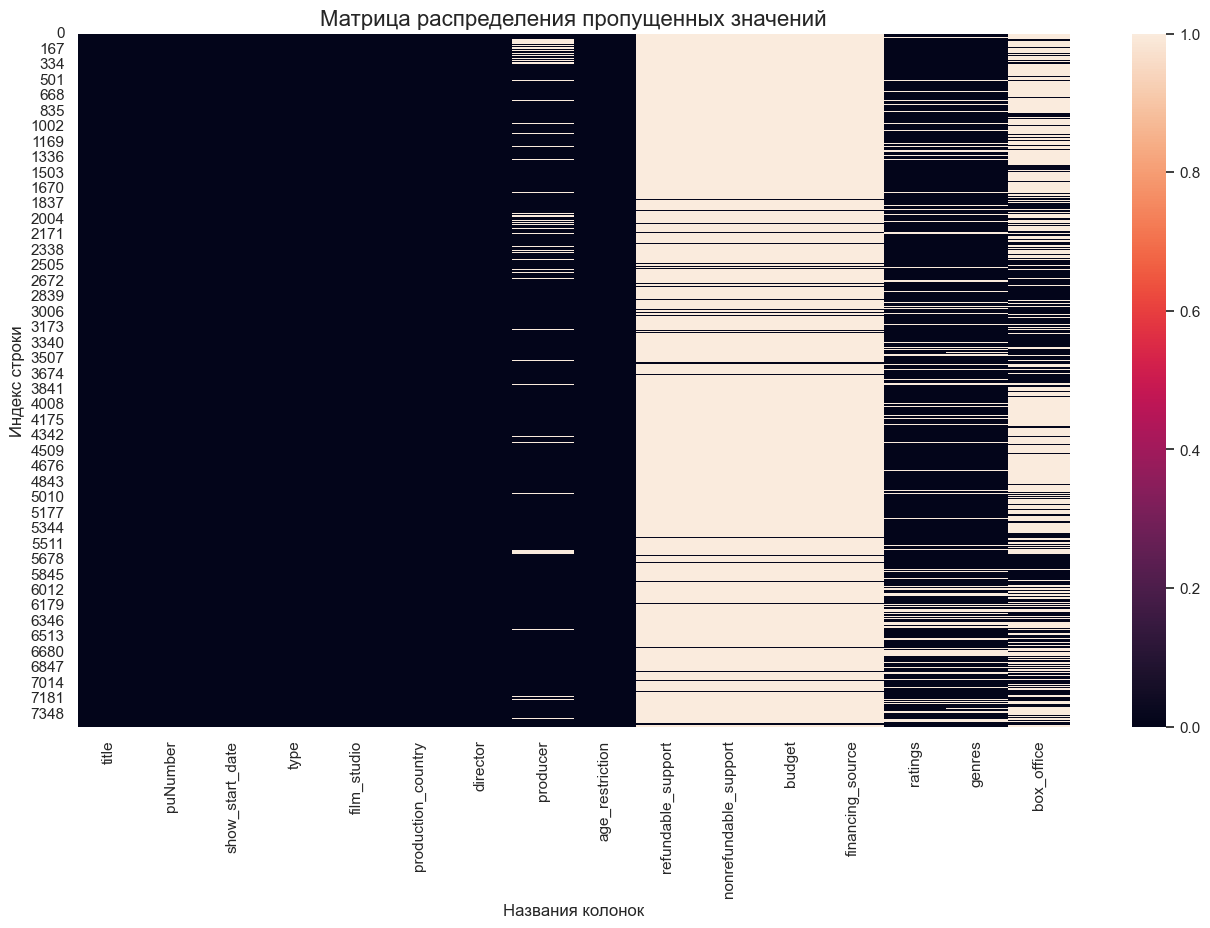

In [23]:
sns.heatmap(data.isna())
plt.title('Матрица распределения пропущенных значений', fontsize=16)
plt.ylabel('Индекс строки')
plt.xlabel('Названия колонок')
plt.show()

**Мы видим, что пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget`, и `financing_source` совпадают по строкам. Мы можем сделать вывод, что это фильмы не получившие государственную поддержку. Заполним пропущенные значения нулем, в столбцах `refundable_support`, `nonrefundable_support`, `budget`, а в столбце `financing_source` пропущенные значения заполним строкой "отсутствует".**

In [24]:
data.loc[data.budget == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2531,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2873,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3564,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


**У нас есть наблюдения с бюджетом равным 0, но возвращаемые средства и невозвращаемые при этом не равны 0. Давайте будем считать в этих наблюдениях budget = refundable_support + nonrefundable_support**

In [25]:
data.loc[data.budget == 0, 'budget'] = (
    data.loc[data.budget == 0, 'refundable_support'] + 
    data.loc[data.budget == 0, 'nonrefundable_support']
)

In [26]:
for columns in ('refundable_support', 'nonrefundable_support', 'budget'):
    data[columns].fillna(0, inplace=True)

In [27]:
data.financing_source.fillna('отсутствует', inplace=True)

**Проверим есть ли в строчках пропуски в колонках `film_studio`, `production_country` и `director` у фильмов с гос.поддержкой.**

In [28]:
(
    data[(data['film_studio'].isna()) & (data.budget != 0)].shape[0], 
    data[(data['production_country'].isna()) & (data.budget != 0)].shape[0], 
    data[(data['director'].isna()) & (data.budget != 0)].shape[0]
)

(0, 0, 0)

**Удалим строчки с пропущенными значения в столбцах `film_studio`, `production_country` и `director` - их менее 0.4% от всего количества данных**

In [29]:
data.dropna(subset=['film_studio', 'production_country', 'director'], inplace=True)

**Пропущенные значения в остальных переменных мы оставим не заполненными, так как мы не можем логически предположить, что там было. А заполнение типичными значениями может изменить тип распределения и наша оценка получится сильно смещенной.**

##### Вывод:<br>
**Мы заполнили пропущенные значения нулем, в столбцах `refundable_support`, `nonrefundable_support`, `budget`, а в столбце `financing_source` пропущенные значения заполним строкой "отсутствует". Удалили строчки с пропущенными значения в столбцах `film_studio`, `production_country` и `director` - их менее 0.4% от всего количества данных.**

#### Изучим дубликаты в датафрейме

**Фильмы c одинаковым названием, типом, студией, рекомендуемым возрастом, страной и режиссером являются дубликатами. Давайте удалим такие строчки. Рейтинг и сборы у таких строчек оставим средней среди них, а дату выхода будем считать минимальной.**

In [30]:
before = (~data["box_office"].isna()).sum()
print(f'Количество наблюдений кассовых сборов - {before}')

Количество наблюдений кассовых сборов - 3155


In [31]:
data[data[['title', 'film_studio', 'type', 'age_restriction', 'production_country', 'director']].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.0,0.0,0.0,отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.0,0.0,0.0,отсутствует,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",16,0.0,0.0,0.0,отсутствует,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",16,0.0,0.0,0.0,отсутствует,7.7,"фэнтези,приключения,семейный",759526.0
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,12,0.0,0.0,0.0,отсутствует,8.2,"фэнтези,приключения,семейный",1125302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,Знакомство с Факерами 2.,221117511,2011-11-15,Художественный,"Парамаунт Пикчерз, Юниверсал Пикчерз, ДУ Студи...",США,Пол Вайц,"Роберт Де Ниро, Джон Гамбург, Джей Роач, Джейн...",16,0.0,0.0,0.0,отсутствует,6.2,"мелодрама,комедия",NaN
6028,Забытые войны России,112002818,2018-07-16,Документальный,"ООО ""Стар Медиа Дистрибьюшн""",Россия,"П.Сергацков, А.Верещагин","ООО ""Стар Медиа Дистрибьюшн""",12,0.0,0.0,0.0,отсутствует,NaN,NaN,NaN
6227,Великие битвы России,112008518,2018-09-19,Документальный,"ООО ""Стар Медиа Дистрибьюшн""",Россия,"А.Верещагин, О.Филипенко, Д.Ушаков","ООО ""Стар Медиа Дистрибьюшн""",12,0.0,0.0,0.0,отсутствует,6.7,"боевик,военный,история",NaN
6428,Зоя,111022718,2018-11-25,Художественный,Тарханова Юлия Олеговна,Россия,О.Товма,Ю.Тарханова,16,0.0,0.0,0.0,отсутствует,3.9,"история,биография,военный",NaN


**Мы видим что у нас 661 строчка имеет дубликаты. Посчитаем для каждого значения в нашей выборке минимальную дату, средние сборы и среднюю оценку среди его дубликатов.**

In [32]:
data.show_start_date = (
    data.groupby(
        ['title', 'film_studio', 'type', 'age_restriction', 'production_country', 'director']
    ).show_start_date.transform('min')
)
data.box_office = (
    data.groupby(
        ['title', 'film_studio', 'type', 'age_restriction', 'production_country', 'director']
    ).box_office.transform('mean').sort_values()
)
data.ratings = (
    data.groupby(
        ['title', 'film_studio', 'type', 'age_restriction', 'production_country', 'director']
    ).ratings.transform('mean')
)

**А теперь удалим дубликаты.**

In [33]:
(
    data.drop_duplicates(
        subset=['title', 'film_studio', 'type', 'age_restriction', 'production_country', 'director'],
        inplace=True)
)

In [34]:
after = (~data["box_office"].isna()).sum()
print(f'Количество наблюдений кассовых сборов было удалено - {before - after}')

Количество наблюдений кассовых сборов было удалено - 27


**Мы удалили 661 строчку дубликатов, а потеряли 27 наблюдений из кассовых сборов.**

##### Вывод:<br>
**У нас в данных оказалось 661 строчка дубликатов, мы сгруппировали эти дубликаты, вычислили минимальное время, среднюю оценку и средние сборы. И удалили дубликаты из данных.**

#### Изучим категориальные значения

In [35]:
def plot_cat_features(data: pd.DataFrame, column: str, xlabel, *, rotations:int=30) -> None:
    sns.countplot(data=data, x=column, color='darkblue')
    plt.title(f'Распределение переменной {column}')
    plt.ylabel('Количество наблюдений')
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotations)
    plt.show()

**Посмотрим распределение переменной `type`.**

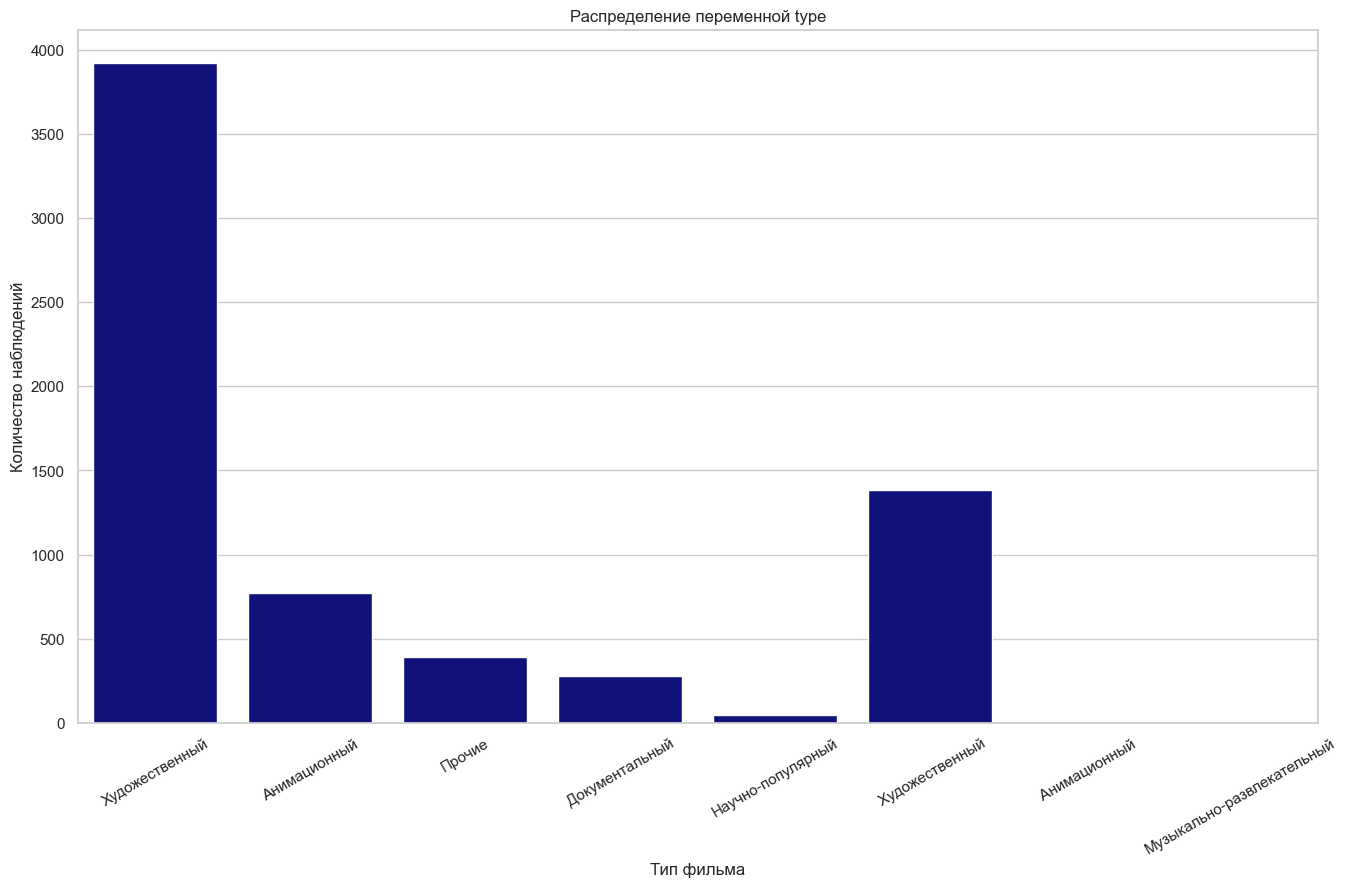

In [36]:
plot_cat_features(data, 'type', 'Тип фильма')

In [37]:
sorted(list(data.type.unique()))

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

**Мы видим что в столбце `type` есть одинаковые типы записанные по-разному. Исправим это.**

In [38]:
data.loc[:, 'type'] = data.type.str.strip()

**Посмотрим как дела обсоят со столбцом `production_country`**

In [39]:
sorted(list(data.production_country.unique()))

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

**У нас многие фильмы содержат несколько стран, будем хранить эти страны в списке.**

In [40]:
def calculate_list_features(value, regex=r'[,]') -> list:
    if not(value is np.nan):
        result = re.split(regex, value.strip())
        return [el.strip() for el in result if el]

In [41]:
data.production_country = data.production_country.apply(func=calculate_list_features, regex=r'[-,]')

In [42]:
data.production_country

0                           [США]
1                          [СССР]
2                           [США]
5                          [СССР]
6                          [СССР]
                  ...            
7480             [Великобритания]
7481                        [США]
7482                [США, Канада]
7483    [Республика Кипр, Россия]
7484    [Республика Кипр, Россия]
Name: production_country, Length: 6797, dtype: object

**Посмотрим распределение `age_restriction`.**

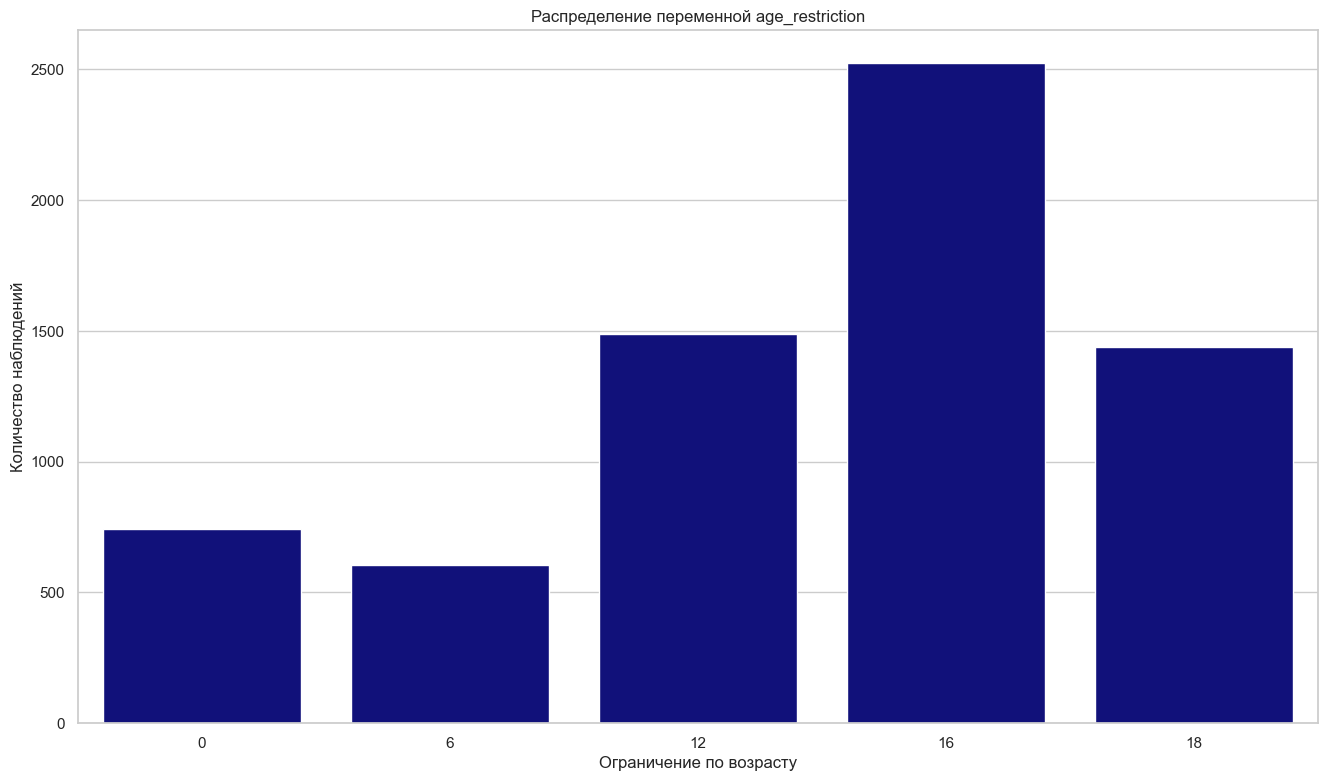

In [43]:
plot_cat_features(data, 'age_restriction', 'Ограничение по возрасту', rotations=0)

**Здесь все в порядке, мы видим что в нашей выборке преобладают фильмы с ограничение 16 лет.**

**Посмотрим значения в столбце студий.**

In [44]:
sorted(list(data.film_studio.unique()))

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


**В этом столбце тоже есть фильмы с несколькими студиями добавим их в список.**

In [45]:
data.film_studio = data.film_studio.apply(calculate_list_features, regex=r'[,]')

**Посмотрим значения в столбце режиссер.**

In [46]:
sorted(list(data.director.unique()))

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басаев',
 'А.

**Проделаем тоже самое.**

In [47]:
data.director = data.director.apply(calculate_list_features)

**Все тоже самое надо проделать с продюсером и жанром.**

In [48]:
data.producer = data.producer.apply(calculate_list_features)

In [49]:
data.genres = data.genres.apply(calculate_list_features)

##### Вывод:<br>
**В столбце `type` одинаковые категории были записаны по разному. В столбцах `production_country`, `film_studio`, `director`, `producer`, `genres` одно значение может содержать несколько категорий, поэтому мы все эти значения добавили в список и будем хранить в списке.**

#### Проверим количественные значения

In [50]:
def plot_distribution(data, col, xlabel, *, bins=50):
    f, ax = plt.subplots(nrows=2, ncols=1, sharex=False, gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(f'Распределение переменной - {col}')
    sns.boxplot(data=data, x=col, ax=ax[0], orient='h')
    sns.histplot(data=data, x=col, ax=ax[1], bins=bins)
    ax[0].set_xlabel('')
    ax[1].set_ylabel('Количество наблюдений')
    ax[1].set_xlabel(xlabel)
    plt.show()

**Сохраним общее количество наблюдений**

In [51]:
all_observations = data.shape[0]

**Посмотрим распределение `refundable_support`.**

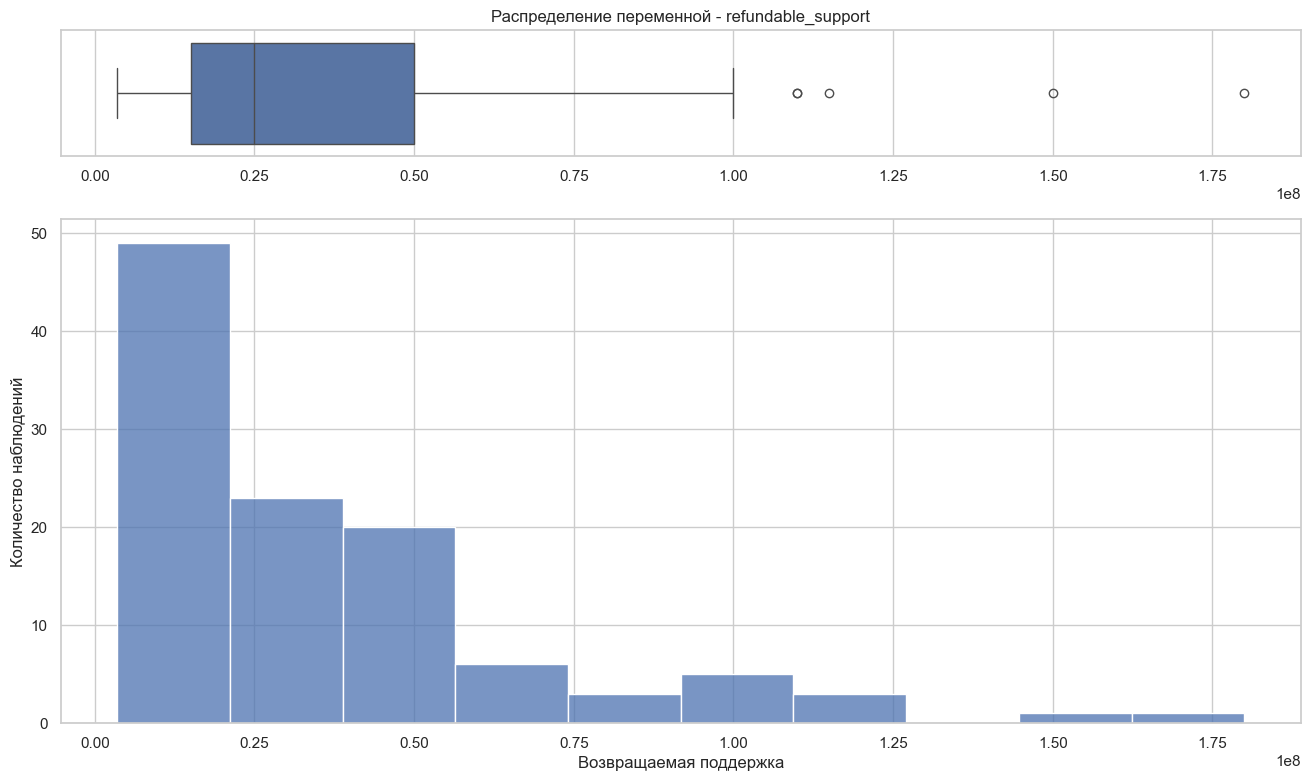

In [52]:
plot_distribution(data[data['refundable_support'] > 0], 'refundable_support', 'Возвращаемая поддержка', bins=10)

**Выглядит правдиво, удалим выбросы, значения более 150 млн.**

In [53]:
data = data[data['refundable_support'] < 1.5e8]

In [54]:
print(f'Мы потеряли {1 - data.shape[0] / all_observations:.3%} от всех наблюдений')

Мы потеряли 0.029% от всех наблюдений


In [55]:
print(f'Мы потеряли {1 - data[data.budget != 0].shape[0] / with_support:.3%} от всех наблдений')

Мы потеряли 0.602% от всех наблдений


**Посмотрим распределение `nonrefundable_support`.**

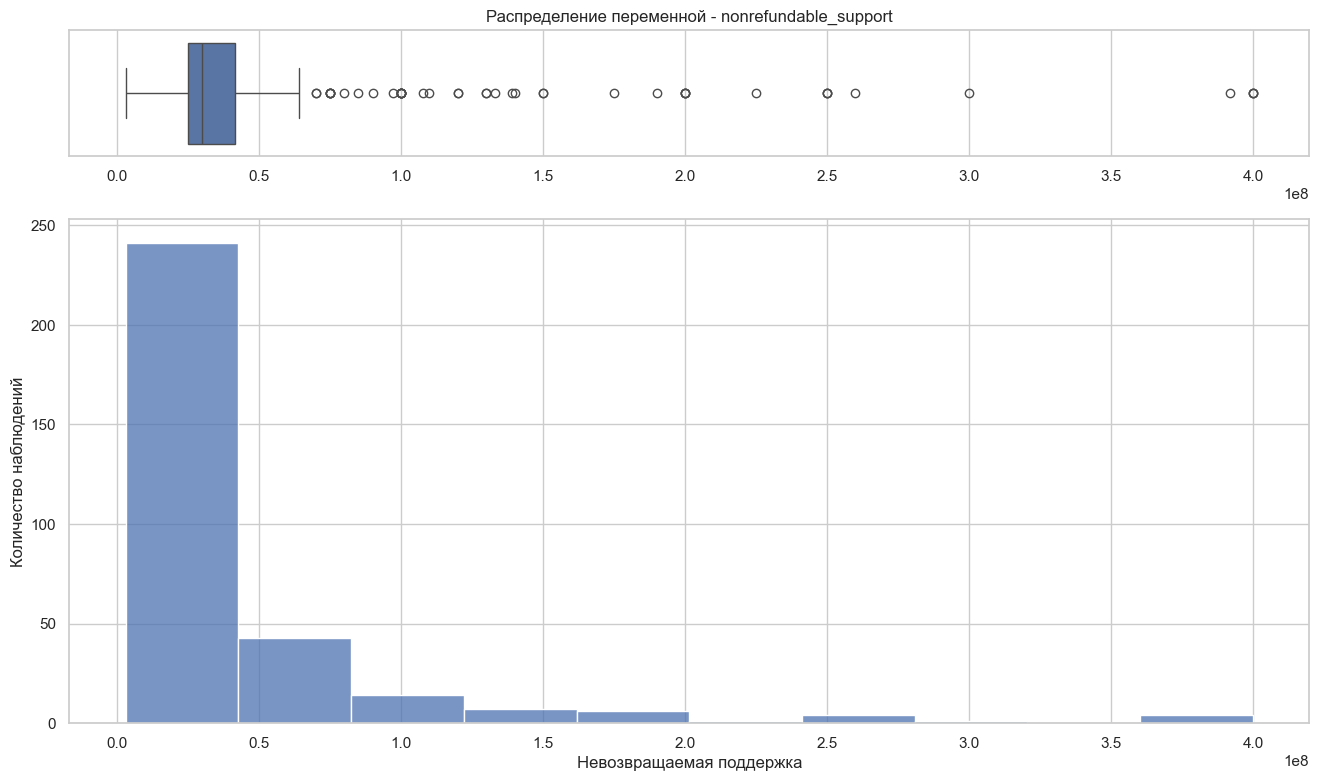

In [56]:
plot_distribution(data[data['nonrefundable_support'] > 0], 
                  'nonrefundable_support', 
                  'Невозвращаемая поддержка', 
                  bins=10)

**Удалим выбросы, значения более 300 млн.**

In [57]:
data = data[data['nonrefundable_support'] < 3e8]

In [58]:
print(f'Мы потеряли {1 - data.shape[0] / all_observations:.3%} от всех наблюдений')
print(f'Мы потеряли {1 - data[data.budget != 0].shape[0] / with_support:.3%} от всех наблдений')

Мы потеряли 0.103% от всех наблюдений
Мы потеряли 2.108% от всех наблдений


**Посмотрим распределение `budget`.**

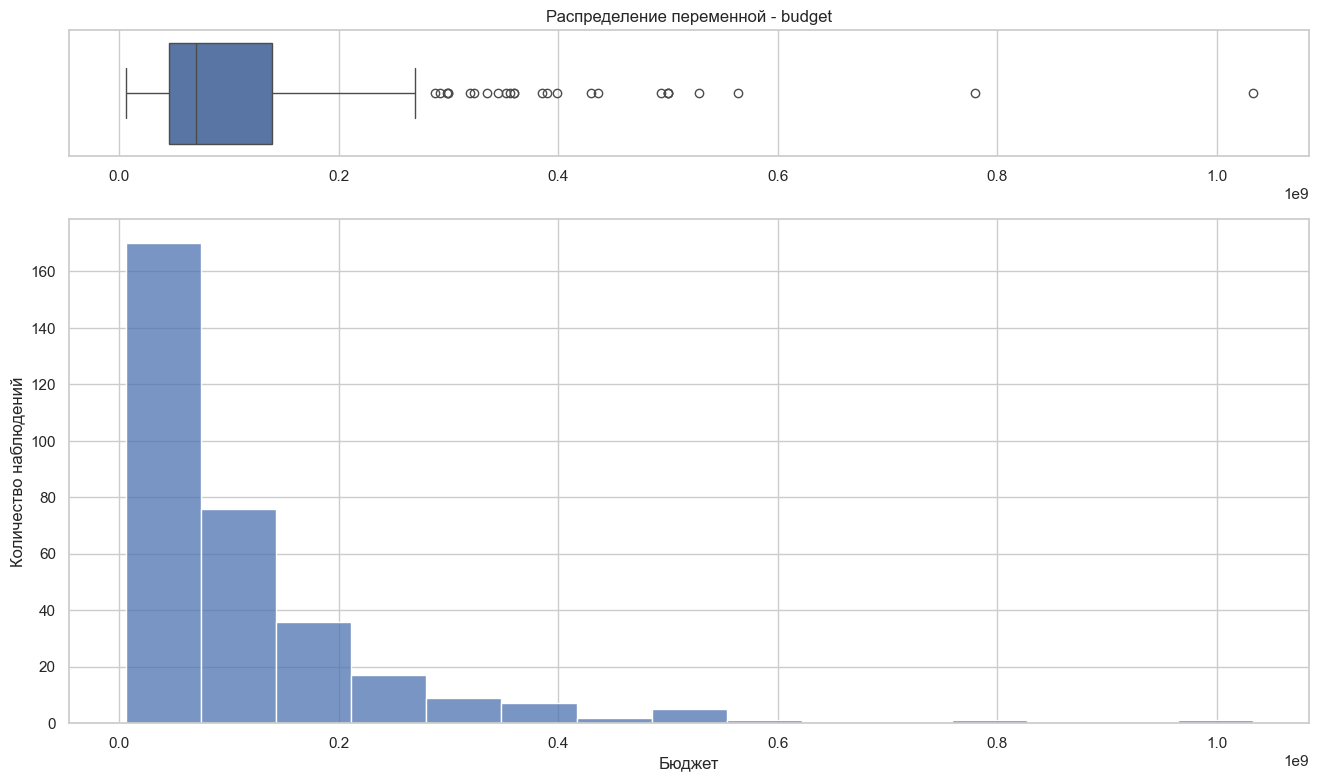

In [59]:
plot_distribution(data[data['budget'] > 0], 'budget', 'Бюджет', bins=15)

**Удалим выбросы, значения более 600 млн.**

In [60]:
data = data[data['budget'] < 6e8]

In [61]:
print(f'Мы потеряли {1 - data.shape[0] / all_observations:.3%} от всех наблюдений')
print(f'Мы потеряли {1 - data[data.budget != 0].shape[0] / with_support:.3%} от всех наблдений')

Мы потеряли 0.132% от всех наблюдений
Мы потеряли 2.711% от всех наблдений


**Посмотрим распределение `ratings`.**

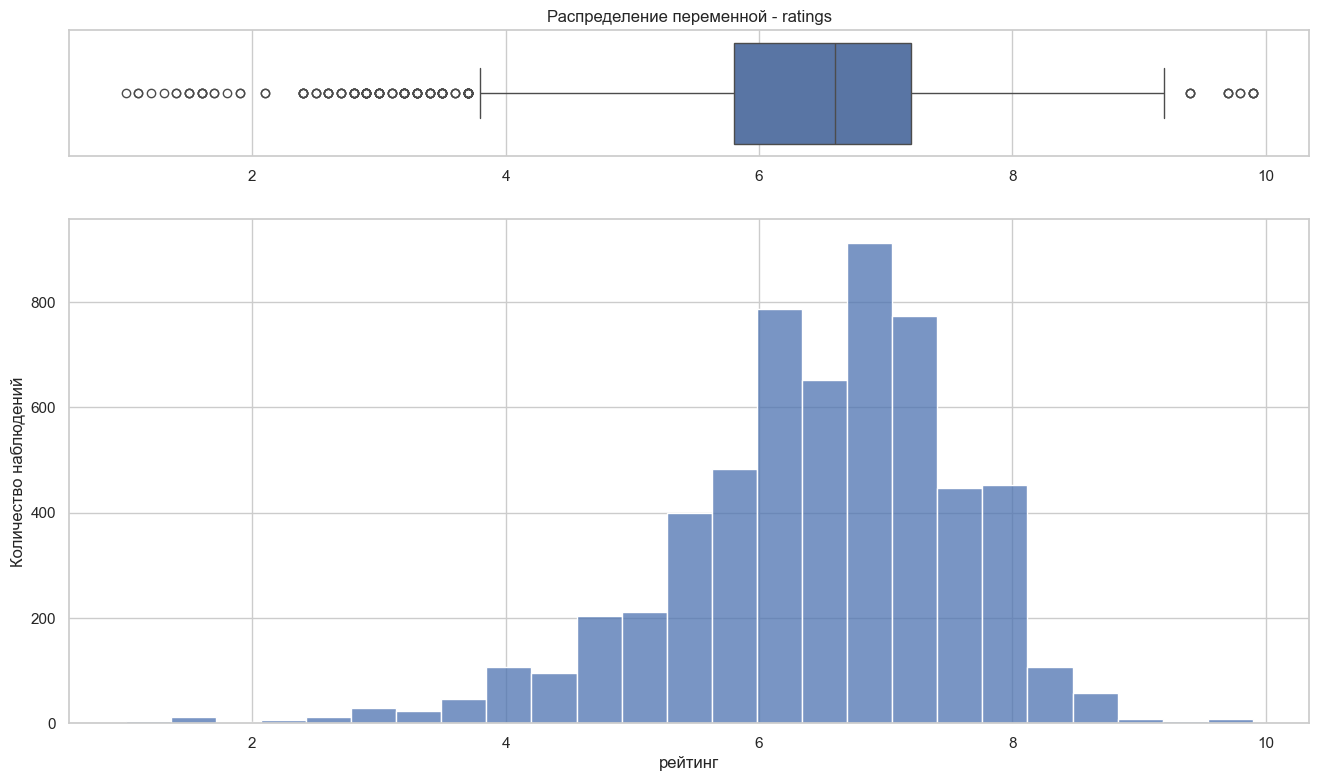

In [62]:
plot_distribution(data[data['ratings'] > 0], 'ratings', 'рейтинг', bins=25)

**У рейтинга красивое распределение похожее на нормальное.**

**Ну и осталось посмотреть распределение сборов.**

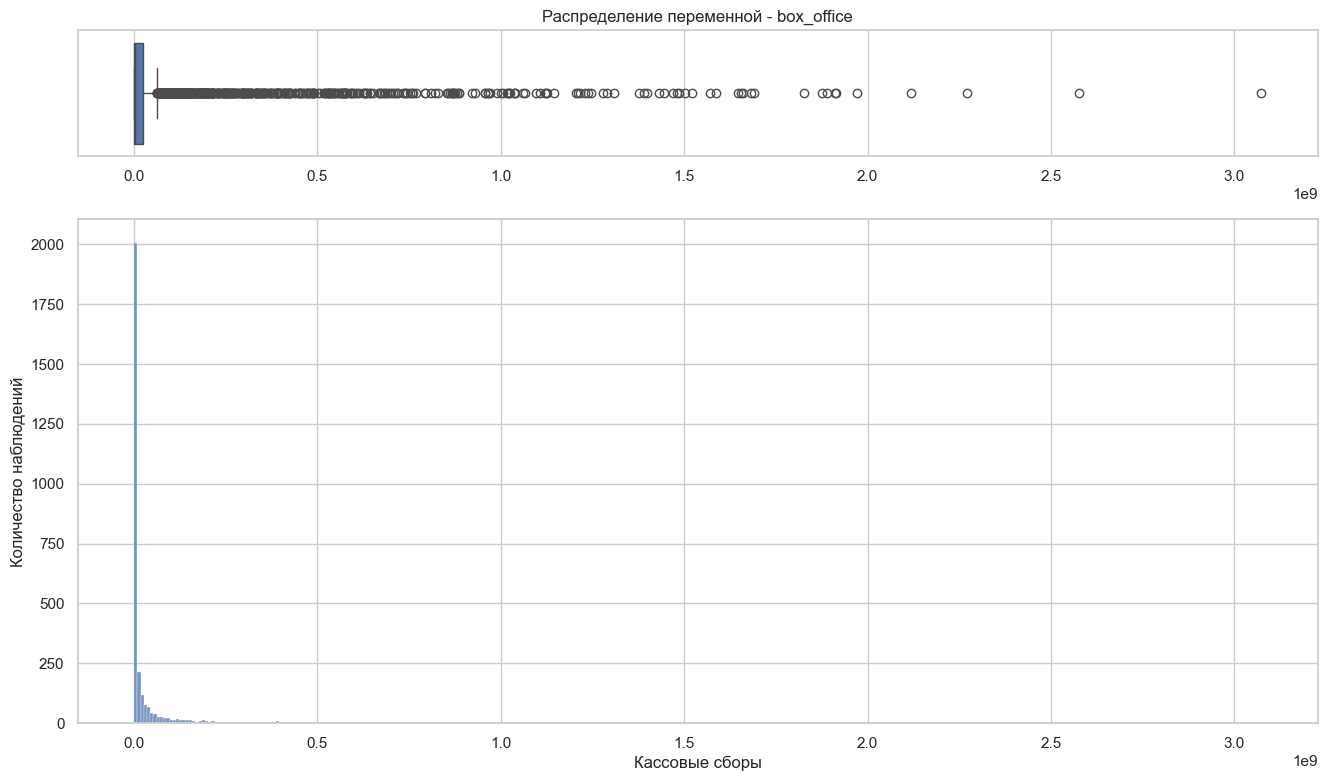

In [63]:
plot_distribution(data[(data['box_office'] > 0)], 'box_office', 'Кассовые сборы', bins=350)

**Странно мы имеем очень небольшие значения.**

In [64]:
data[data['box_office'] < data.box_office.quantile(0.02)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,Анна Павлова,111011013,2013-12-19,Художественный,"[совместное производство Киностудия ""Мосфильм""...","[СССР, Франция, Англия, Куба, ГДР]",[Эмиль Лотяну],None,6,0.0,0.0,0.0,отсутствует,7.700000,"[драма, биография, музыка]",0.0
151,Жестокий романс,111006013,2013-10-18,Художественный,"[Киностудия ""Мосфильм""]",[СССР],[Э.Рязанов],None,12,0.0,0.0,0.0,отсутствует,8.100000,"[драма, мелодрама, история]",40.0
163,Журавушка,111011914,2014-10-01,Художественный,"[Киностудия ""Мосфильм""]",[СССР],[Н.Москаленко],None,12,0.0,0.0,0.0,отсутствует,7.600000,"[драма, мелодрама]",165.0
164,За спичками,111006113,2013-10-18,Художественный,"[Киностудия ""Мосфильм"", ""СУОМИ-ФИЛЬМ""]","[СССР, Финляндия]","[Л.Гайдай, Р.Орко]",None,12,0.0,0.0,0.0,отсутствует,7.500000,"[комедия, приключения, история]",100.0
211,Одиноким предоставляется общежитие,111018614,2014-12-01,Художественный,"[Киностудия ""Мосфильм""]",[СССР],[С.Самсонов],None,12,0.0,0.0,0.0,отсутствует,7.800000,"[мелодрама, комедия]",100.0
212,Обыкновенный фашизм,112000215,2015-04-23,Документальный,"[Киностудия ""Мосфильм""]",[СССР],[М.Ромм],None,16,0.0,0.0,0.0,отсутствует,8.300000,"[документальный, военный, история]",150.0
237,Подранки,111007613,2013-10-18,Художественный,"[Киностудия ""Мосфильм""]",[СССР],[Н.Губенко],None,12,0.0,0.0,0.0,отсутствует,8.200000,[драма],0.0
351,Волшебное приключение,124000905,2015-01-18,Анимационный,"[Экшион Филмз, Патэ Синема, Болексбразерс]","[Великобритания, Франция]",[Дэйв Бортвик],"[Клауди Горский, Энди Лэйтон, Лаурен Родон, Па...",0,0.0,0.0,0.0,отсутствует,5.700000,"[мультфильм, фэнтези, комедия]",100.0
372,Механик_,221002215,2010-12-29,Художественный,"[Миллениум Филмз, Нью Имейдж Интертейнмент]",[США],[Саймон Уэст],"[Рене Бессон, Авэ Лернер, Дэнни Лернер]",18,0.0,0.0,0.0,отсутствует,6.800001,"[боевик, триллер]",135.0
596,Запах вереска,111003012,2012-05-23,Художественный,"[ООО ""Студия РИМ""]",[Россия],[А.Магомедов],"[М.Балашова, Е.Миронов]",16,0.0,0.0,0.0,отсутствует,6.300000,[комедия],0.0


**У нас "Астерикс и Обеликс в Британии 3D" собрал 80 рублей, а "Елки" 125 рублей. Распределение достаточно ровное есть много значений в каждом порядке, какая ошибка в данных можно только догадываться. Поэтому при анализе данного столбца мы вряд ли получим достоверную информацию.**

In [65]:
print(f'Наблюдений, в которых, кассовые сборы меньше 1 млн.руб. с поддержкой - '
      f'{data[((data.box_office < 1e6) & (data.budget != 0))].shape[0]}')

Наблюдений, в которых, кассовые сборы меньше 1 млн.руб. с поддержкой - 73


**Мы не можем удалить такое большое количество наблюдений.**

##### Вывод:<br>
**Мы удалили выбросы во всех наших количественных переменных. Столбец `box_office` имеет аномально низкие значения. Глядя на распределение этого столбца, мы не можем определить границу этих аномальных значений, поэтому результат анализа этого столбца не принес нам полезной информации.**

#### Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [66]:
data['year'] = data.show_start_date.dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [67]:
def head_element(value: list) -> str:
    if value:
        return value[0]

In [68]:
data['head_director'] = data.director.map(head_element)
data['head_genre'] = data.genres.map(head_element)

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [69]:
data['support_share'] = (data.refundable_support + data.nonrefundable_support) / data.budget

**Посмотрим распределение доли государсвенной поддержки.**

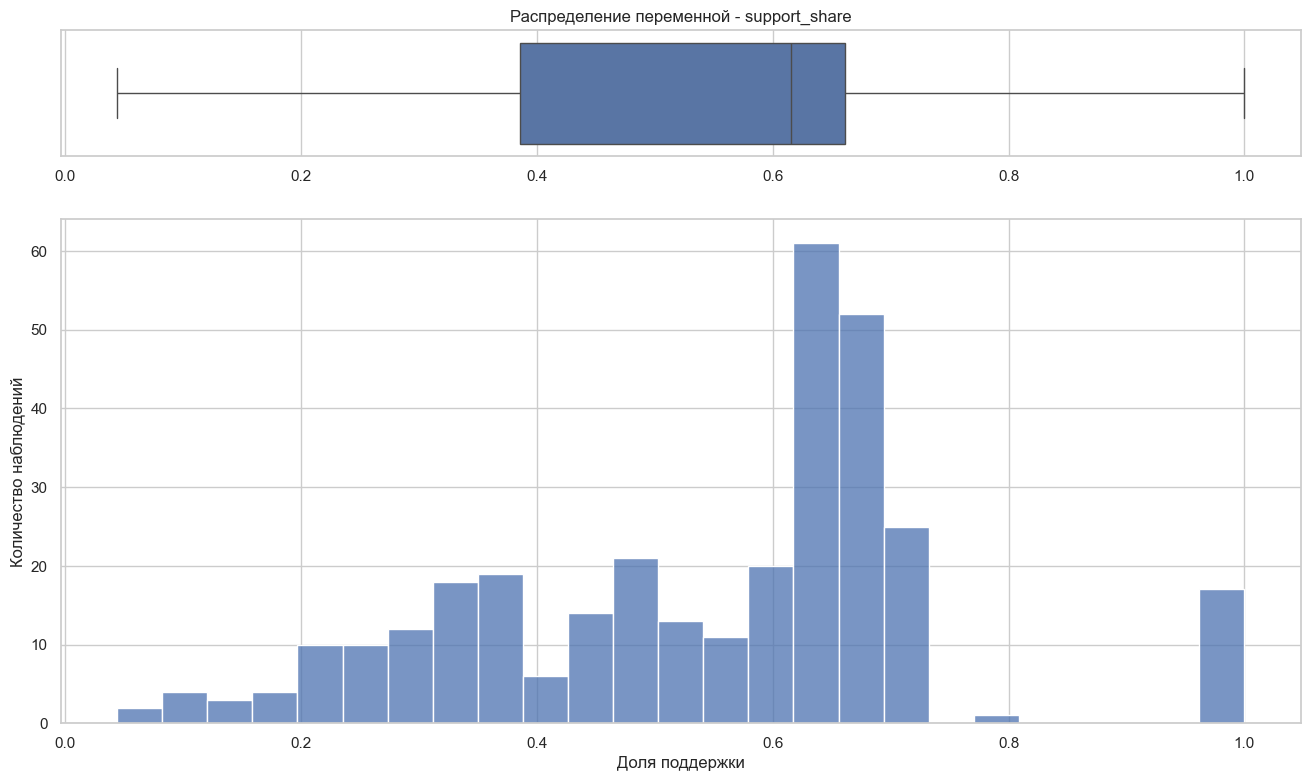

In [70]:
plot_distribution(data, 'support_share', 'Доля поддержки', bins=25)

**Создадим флаговую переменную, показывающую есть ли данные о прокате.**

In [71]:
data['has_box_office'] = ~data.box_office.isna()

**Создадим флаговую переменную показывающую имел ли фильм государственную поддержку.**

In [72]:
data['is_support'] = data.budget != 0

##### Вывод:<br>
**Мы создали новые переменные необходимые для дальнейшего анализа.**

### Проведем исследовательский анализ данных

- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам.

In [73]:
def plot_share(data, x, hue, title='', ylabel=''):
    table_stat = data.groupby('year')[hue].mean()
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=16)
    sns.countplot(data=data, x=x, hue=hue, ax=ax)
    ax.set_ylabel('Количество фильмов', fontsize=16)
    ax2 = ax.twinx()
    sns.barplot(x=table_stat.index, y=table_stat, ax=ax2, alpha=0.3, color='black')
    ax2.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel("Год")
    plt.show()

Доля фильмов c указанной информацией о прокате - 45.96%


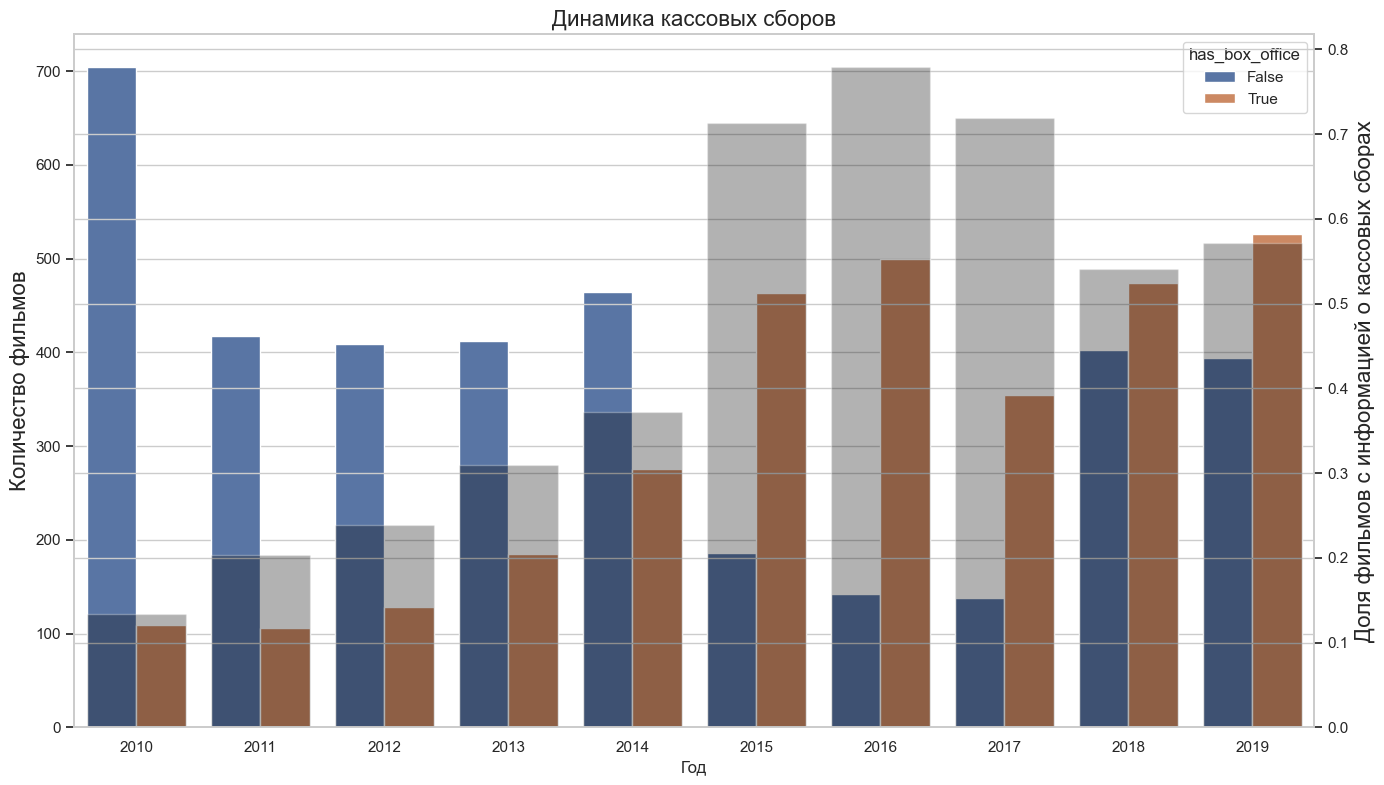

In [74]:
print(f'Доля фильмов c указанной информацией о прокате - {data.has_box_office.mean():.2%}')
plot_share(data, 'year', 'has_box_office', 'Динамика кассовых сборов', 'Доля фильмов с информацией о кассовых сборах')

**Серые столбцы на нашем графике показывают долю фильмов с указанной информацией о прокате, как мы можем заметить, эта доля, повышалась с 2010 года по 2016, а после 2016 начала снижаться. Пропусков box_office меньше всего в период с 2015 по 2017 годы.**

- Изучим, как менялась динамика проката по годам.

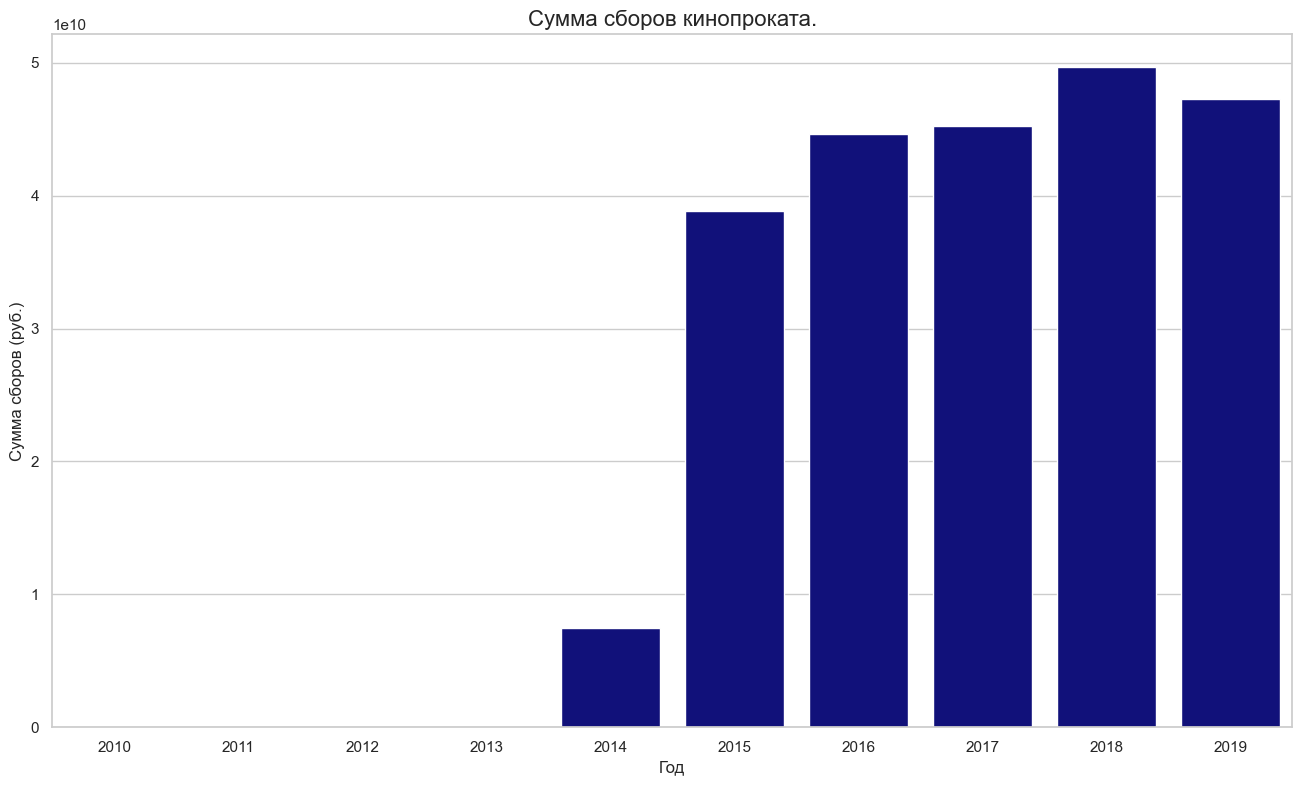

In [75]:
years = data.groupby('year').box_office.sum()
sns.barplot(x=years.index, y=years, color='darkblue')
plt.title('Сумма сборов кинопроката.', fontsize=16)
plt.xlabel('Год')
plt.ylabel('Cумма сборов (руб.)')
plt.show()

In [76]:
data.pivot_table(index='year', values='box_office', aggfunc='sum')

,box_office
year,
2010,9.340694e+06
2011,1.450160e+07
2012,6.879408e+06
2013,2.979846e+07
2014,7.444545e+09
2015,3.888042e+10
2016,4.462747e+10
2017,4.526972e+10
2018,4.966836e+10


**Таблицы мы видим, что оутсайдером по сборам является 2012, а лидером 2019 немного оторвавшись от 2018. Сумма сборов очень сильно выросла в 2014 году на 3 порядка. И продолжила увеличиваться вплоть до 2018 года.**

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [77]:
box_office_stat = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']) / 1e3
box_office_stat.columns = ('Среднее (т.р.)', 'медиана (т.р.)')
display(box_office_stat.style.format(
    "{:.0f}"
).background_gradient(
    cmap='Reds',  
    axis=0
))

,Среднее (т.р.),медиана (т.р.)
year,,
2010,86,2
2011,137,3
2012,54,5
2013,161,4
2014,27071,20
2015,83975,4973
2016,89255,4658
2017,127881,9944
2018,104786,8912


**Мы видим, что среднее и медиана максимальная в 2017 году. Среднее минимально в 2012, медиана минимальна в 2010. После 2017 года наблюдается спад типичных сумм сборов. Причиной такой большой разницы между медианой и средним, мы можем увидеть на графике распределения кассовых сборов, оно имеет длинный хвост слева, а среднее сильнее притягивается к выбросам, чем медиана.**

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.)

In [78]:
age_restriction_stat = (
    data.query('year >= 2015 and year <=2019')
    .pivot_table(index='age_restriction', columns='year',
                 values='box_office', aggfunc='sum')
)

display(age_restriction_stat.style.format(
    "{:.0f}"
).background_gradient(
    cmap='Reds',  
    axis=0
))

year,2015,2016,2017,2018,2019
age_restriction,,,,,
0,326210558,149988772,229598930,32449002,17746067
6,8700538271,9214366352,9306456002,10104974623,12518951591
12,13616082009,12186890678,7851427661,14267250436,11962495588
16,10952700407,16282302848,18230745178,16503602347,12643298894
18,5284887484,6793923429,9651495581,8760085501,10121796304


**Как мы можем увидеть лидером по количеству сборов на всем промежутке времени является категория 16+, за исключением 2015 года.
В 2015 году максимальное количество сборов собрали фильмы с возрастным ограничением 12+.**

**Теперь посмотрим на типичный сбор в каждой категории. В качестве типичного значения возьмем медиану, потому что среднее очень сильно смещено в нашем случае.**

In [79]:
age_restriction_stat = (
    data.query('year >= 2015 and year <=2019')
    .pivot_table(index='age_restriction', columns='year',
                 values='box_office', aggfunc='median')
)

display(age_restriction_stat.style.format(
    "{:.0f}"
).background_gradient(
    cmap='Reds',  
    axis=0
))

year,2015,2016,2017,2018,2019
age_restriction,,,,,
0,2956298,2880099,22178956,3616937,3885434
6,20380982,4004862,50274982,14688850,12525532
12,15351562,9680744,9010548,10035323,3403800
16,4676819,5918703,9702077,9010639,3173686
18,4616615,6375268,8212677,7179466,5603217


**Как мы можем увидеть на всем промежутке как правило фильмы с возрастным ограничением "6+" собирают больше всех, за исключением 2016 года.**

#### Исследуем фильмы, которые получили государственную поддержку

**Посмотрим сколько выделялось средств на поддержку кино.**

Общая сумма поддержки 35.227 млрд.руб


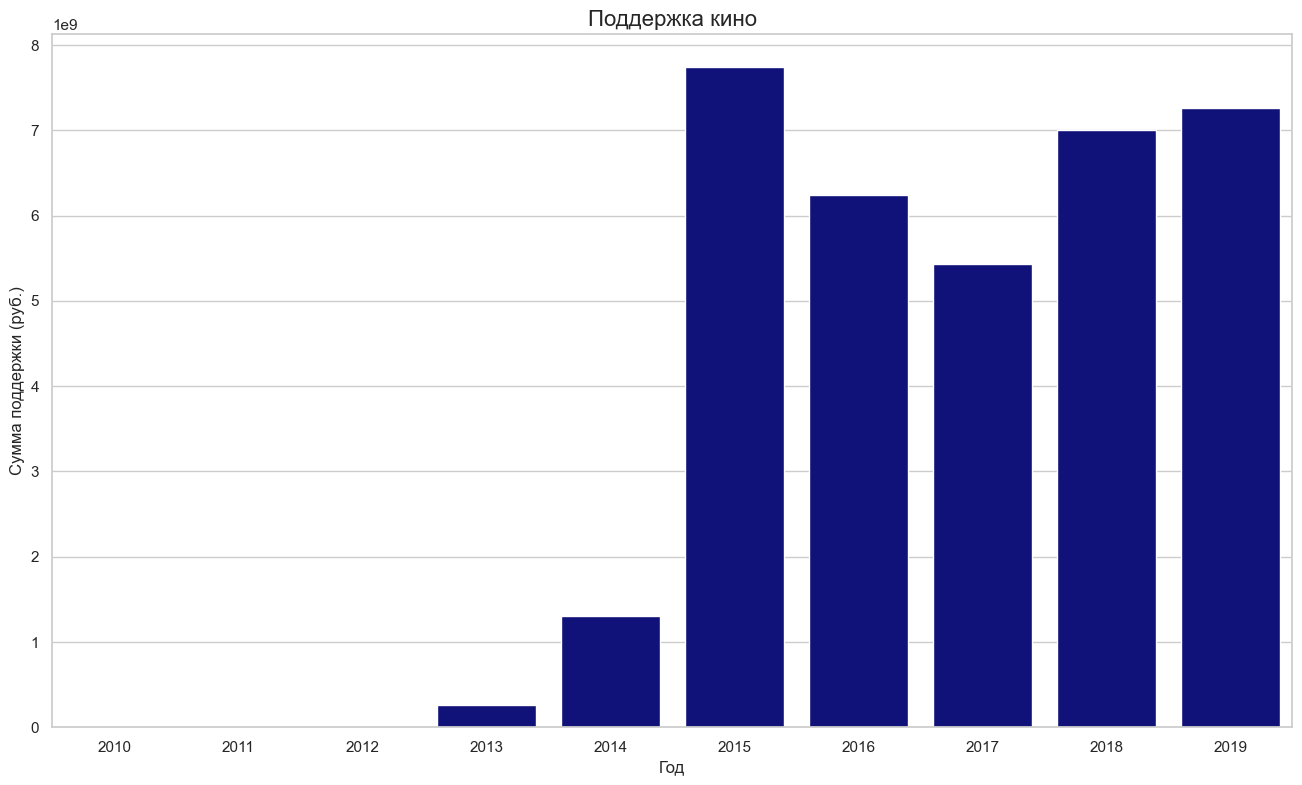

In [80]:
years = data.groupby('year').budget.sum()
print(f'Общая сумма поддержки {years.sum() / 1e9:.3f} млрд.руб')
sns.barplot(x=years.index, y=years, color='darkblue')
plt.title('Поддержка кино', fontsize=16)
plt.xlabel('Год')
plt.ylabel('Cумма поддержки (руб.)')
plt.show()

**Мы видим, что с 2015 по 2019 год государство активно поддерживало кинопрокат.**

**Посмотрим распределение гос. поддержки по жанрам**

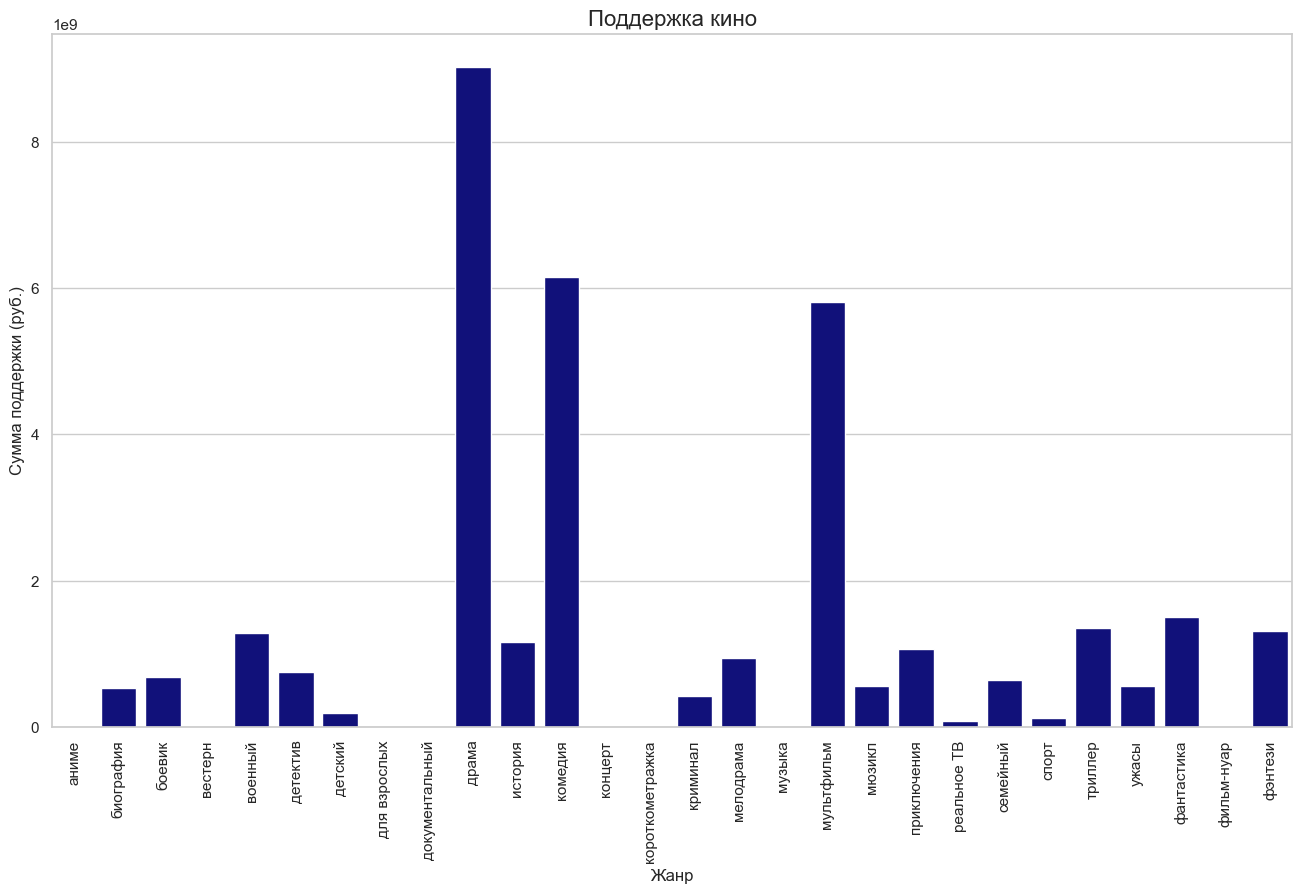

In [81]:
years = data.groupby('head_genre').budget.sum()
sns.barplot(x=years.index, y=years, color='darkblue')
plt.title('Поддержка кино', fontsize=16)
plt.xlabel('Жанр')
plt.ylabel('Cумма поддержки (руб.)')
plt.xticks(rotation=90)
plt.show()

**Государство сильнее всего поддерживает драму, комедию и мультфильмы.**

**Посмотрим топ-5 режиссеров из тех кто получил поддержку.**

In [82]:
df = (data[data.budget != 0].groupby('head_director').box_office.sum().sort_values(ascending=False)[:5].to_frame())
df.columns = ('Сумма_сборов',)
df

,Сумма_сборов
head_director,
К.Шипенко,3.827772e+09
Д.Дьяченко,2.404899e+09
А.Сидоров,2.271754e+09
О.Трофим,1.445732e+09
Д.Шмидт,1.412476e+09


**Посмотрим динамику финансирования этих режисеров.**

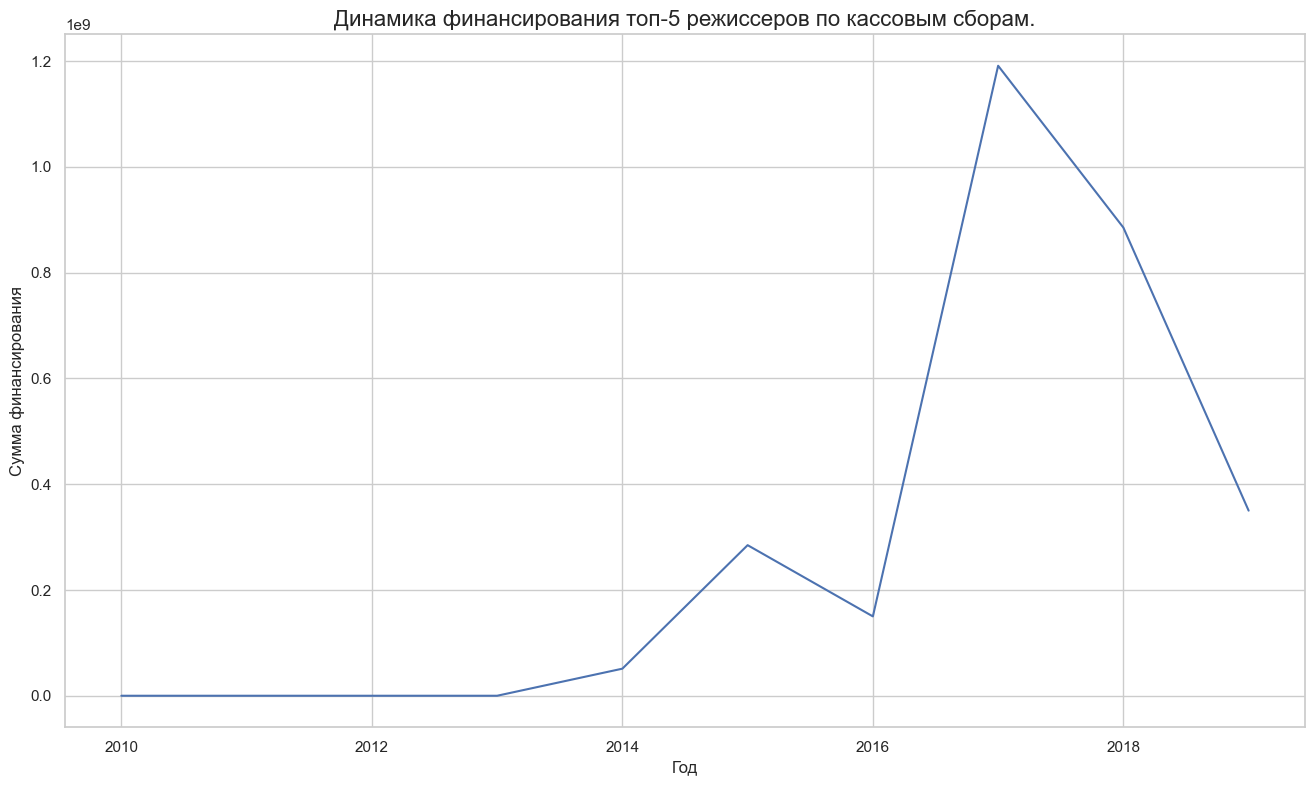

In [83]:
ser = data.query('head_director in @df.index').groupby('year').budget.sum()
sns.lineplot(x=ser.index, y=ser)
plt.title('Динамика финансирования топ-5 режиссеров по кассовым сборам.', fontsize=16)
plt.ylabel('Сумма финансирования')
plt.xlabel('Год')
plt.show()

**Топ-5 студий получивших гос. финансирование**

In [84]:
data['head_studio'] = data.film_studio.map(lambda x: x[0])

In [85]:
df = (data[data.budget != 0].groupby('head_studio').box_office.sum().sort_values(ascending=False)[:5].to_frame())
df.columns = ('Сумма_сборов',)
df

,Сумма_сборов
head_studio,
"ООО ""ТаББаК""",3.351096e+09
"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",3.073569e+09
"ООО ""Водород 2011""",2.974184e+09
"ООО ""Студия анимационного кино ""Мельница""",2.890370e+09
"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""ММЕ""",2.460360e+09


**Взглянем на динамику финансирования этих студий**

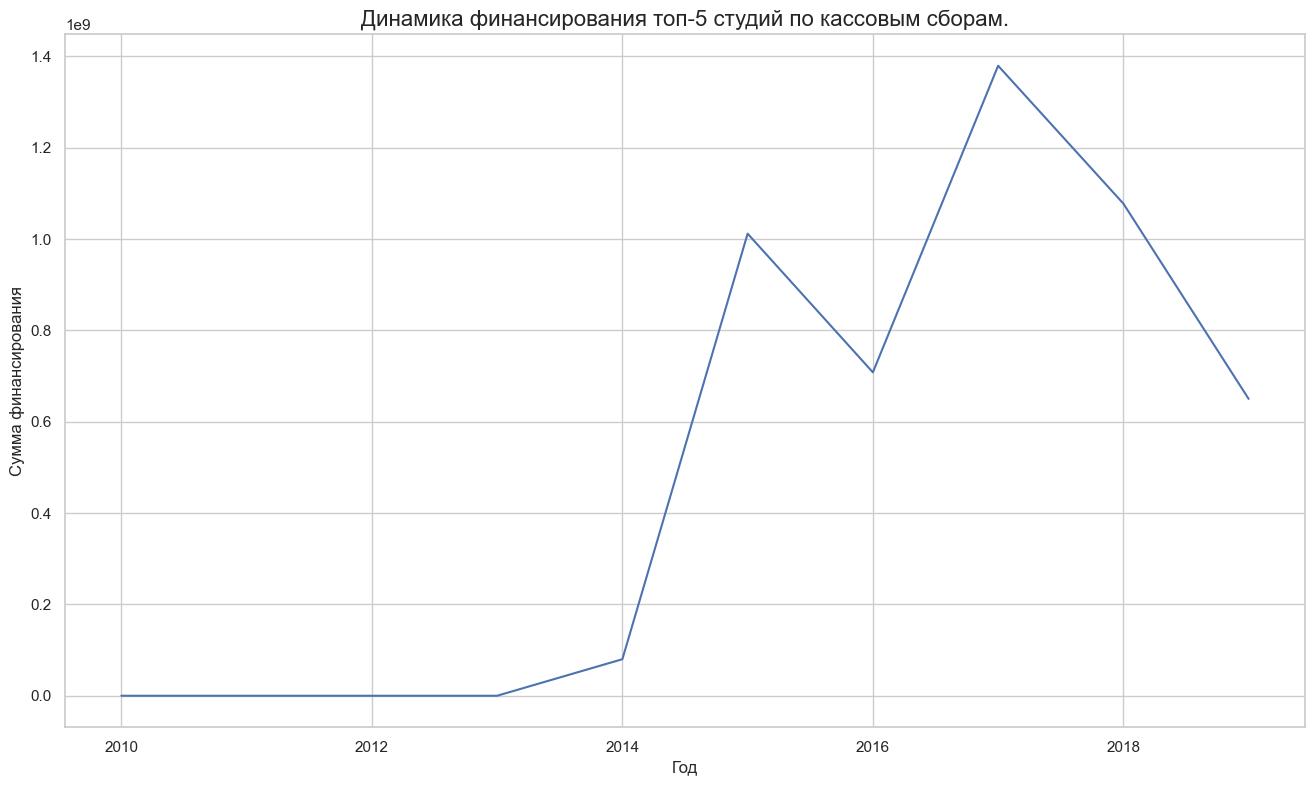

In [86]:
ser = data.query('head_studio in @df.index').groupby('year').budget.sum()
sns.lineplot(x=ser.index, y=ser)
plt.title('Динамика финансирования топ-5 студий по кассовым сборам.', fontsize=16)
plt.ylabel('Сумма финансирования')
plt.xlabel('Год')
plt.show()

**Давайте для начала посмотрим как доля фильмов с государственной поддержкой менялась из года в год.**

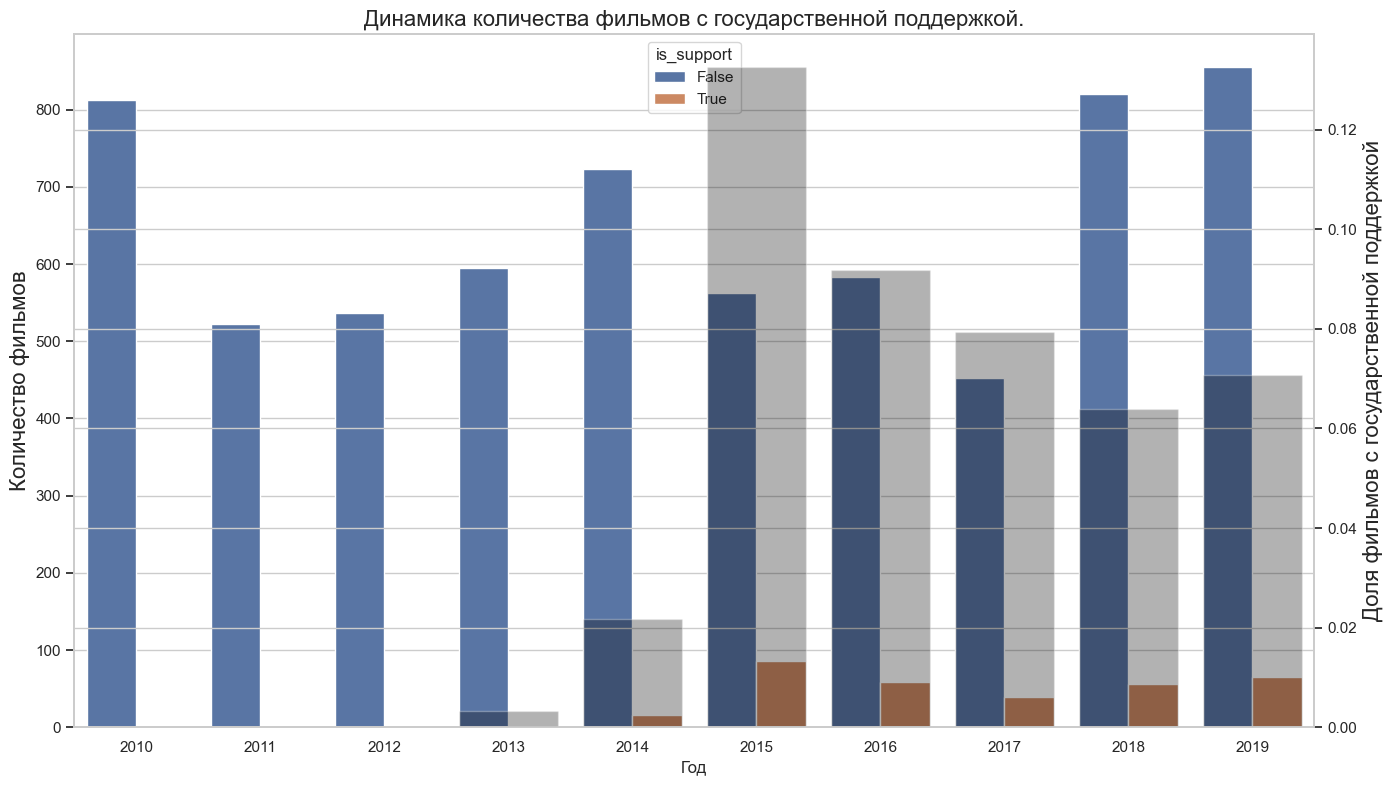

In [87]:
plot_share(data, 'year', 'is_support', 
           'Динамика количества фильмов с государственной поддержкой.', 
           'Доля фильмов с государственной поддержкой')

**Мы видим, что доля фильмов с гос. поддержкой в общем количестве фильмов совсем небольшая с 2010 по 2014 годы. Так давайте анализировать только период с 2015 по 2019 годы.**

**Посмотрим как распределены сборы в фильмах с государственной поддержкой.** 

In [88]:
df = data[data.year >= 2015]

In [89]:
support_stat = df.pivot_table(index='is_support', values='box_office', aggfunc=('median', 'mean'))
support_stat.columns = ('среднее', 'медиана')
display(support_stat.style.format(
    "{:.0f}"
).background_gradient(
    cmap='Reds',  
    axis=0
))

,среднее,медиана
is_support,,
False,94248850,5548200
True,119371036,15049781


**Как мы видим, что среднее и медиана больше у фильмов с гос.поддержкой. Значит мы можем сказать, что как правило фильмы с гос.поддержкой собирают больше средств.**

In [90]:
def plot_dependence_cat(data, column, to, *, limx=1, limy=1, bins=150):
    sns.histplot(data=data, x=column, hue='is_support', bins=bins)
    plt.xlim(0, data[column].quantile(limx))
    plt.ylim(0, limy)
    plt.title(f'Влияние is_support на {to}', fontsize=16)
    plt.xlabel(to)
    plt.ylabel('Количество наблюдений')
    plt.show()

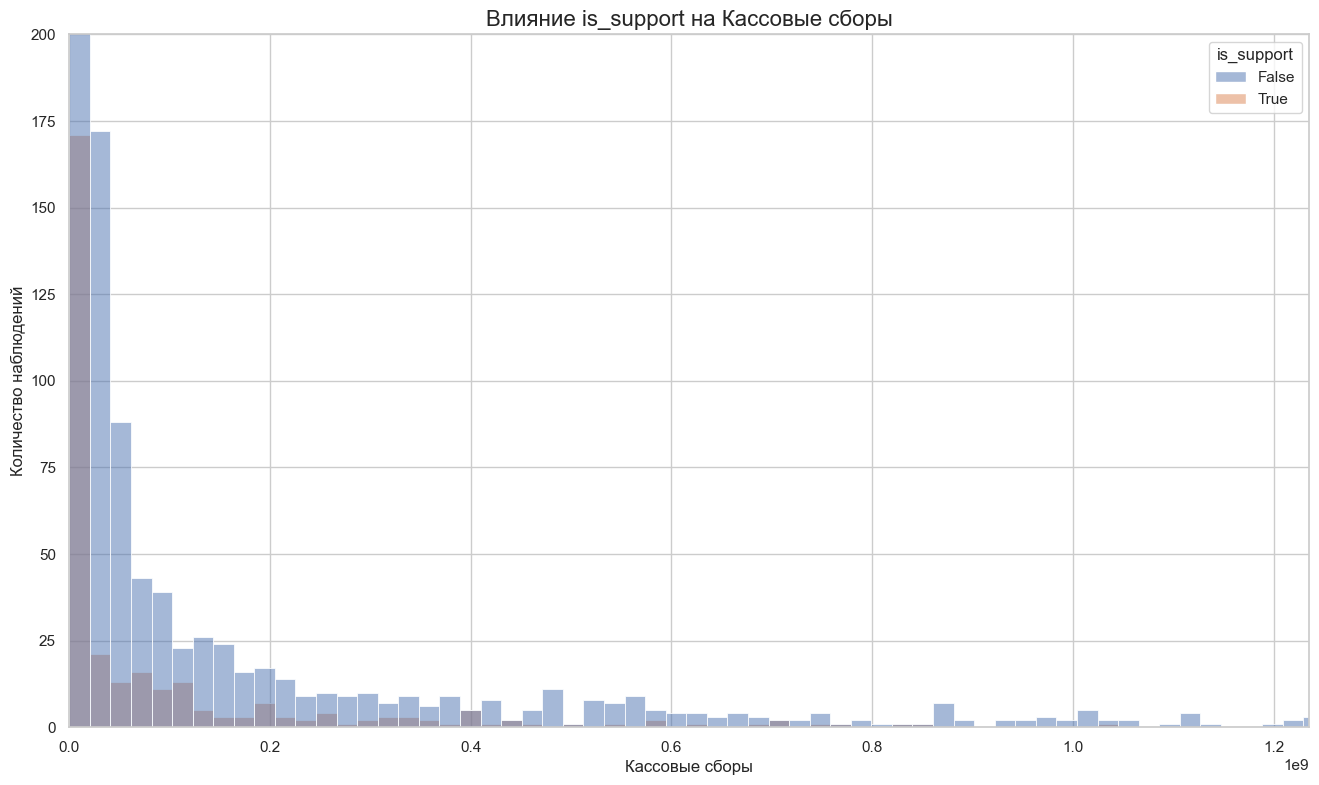

In [91]:
plot_dependence_cat(data, 'box_office', 'Кассовые сборы', limx=0.99, limy=200)

**Наш график поддтверждает это. Фильмы без госсподержки имеют значительно больше выбросов, но медиана выше у фильмов с поддержкой.**

**Давайте теперь проанализируем среднюю и медианную оценки.**

In [92]:
support_stat = df.pivot_table(index='is_support', values='ratings', aggfunc=('median', 'mean'))
display(support_stat.style.format(
    "{:.2f}"
).background_gradient(
    cmap='Reds',  
    axis=0
))

,mean,median
is_support,,
False,6.41,6.50
True,6.00,6.20


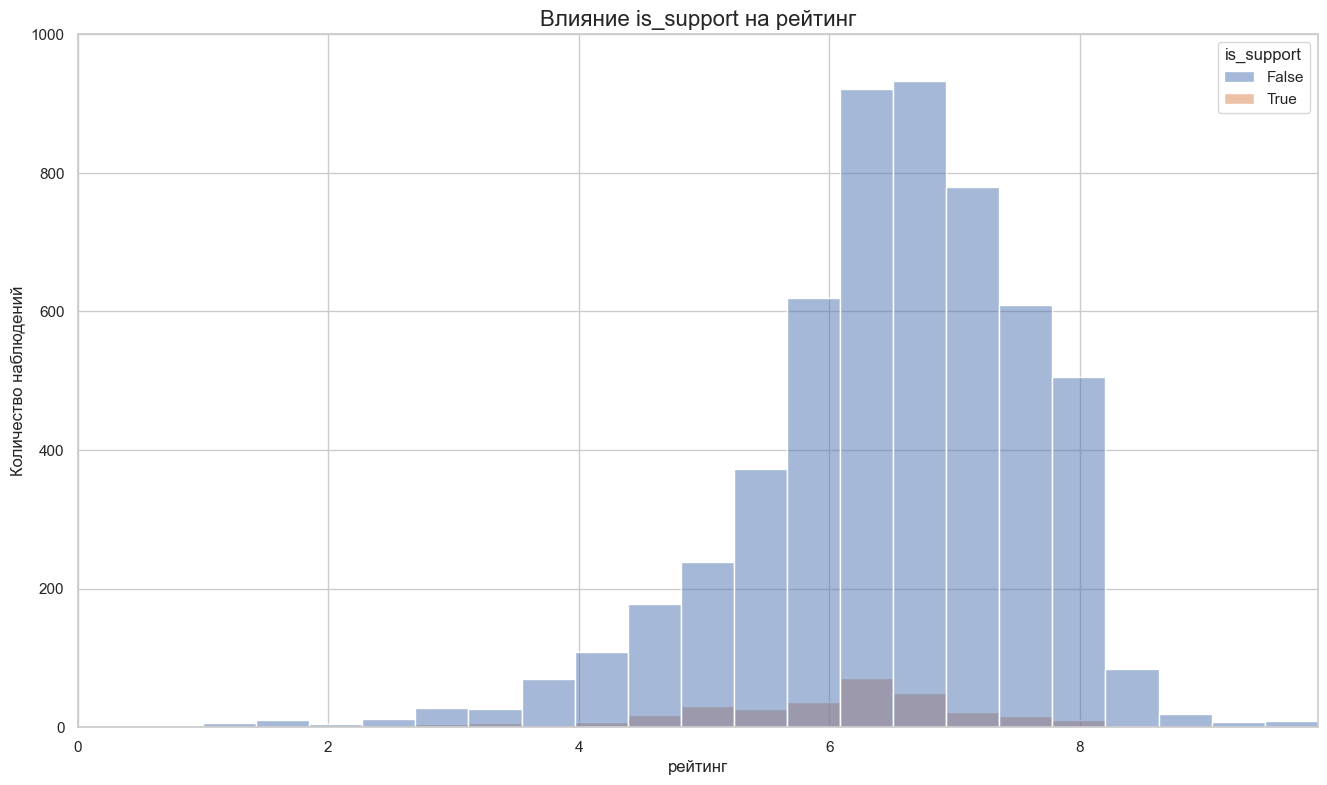

In [93]:
plot_dependence_cat(data, 'ratings', 'рейтинг', limx=1, limy=1000, bins=21)

**А вот оценки по фильмам говорят, что фильмы без поддержки обычно больше нравятся людям.**

#### Вывод:<br>
**Доля фильмов показывающих кассовые сборы, повышалась с 2010 года по 2016, а после 2016 начала снижаться. Пропусков box_office меньше всего в период с 2015 по 2017 годы. Сумма сборов очень сильно выросла в 2014 году на 3 порядка. И продолжила увеличиваться вплоть до 2018 года. После 2017 года наблюдается спад типичных сумм сборов. Лидером по количеству сборов на всем промежутке времени является категория 16+, за исключением 2015 года.
В 2015 году максимальное количество сборов собрали фильмы с возрастным ограничением 12+. Мы можем сказать, что как правило фильмы с гос.поддержкой собирают больше средств. А вот оценки по фильмам говорят, что фильмы без поддержки обычно больше нравятся людям.**

### Общий вывод

**Столбец `puNumber` содержал значение 'нет' поэтому мы не могли привести его к типу int. После удаление этой строчки у нас получилось кастовать этот столбец, и объединить таблицы.**

**Мы привели дату выхода фильма к типу данных datetime, рейтинг к float32, а ограничение по возрасту к типу `int`.**

**Мы заполнили пропущенные значения нулем, в столбцах `refundable_support`, `nonrefundable_support`, `budget`, а в столбце `financing_source` пропущенные значения заполним строкой "отсутствует".Удалили строчки с пропущенными значения в столбцах `film_studio`, `production_country` и `director` - их менее 0.4% от всего количества данных.**

**У нас в данных оказалось 661 строчка дубликатов, мы сгруппировали эти дубликаты, вычислили минимальное время, среднюю оценку и средние сборы. И удалили дубликаты из данных.**

**В столбце `type` одинаковые категории были записаны по разному. В столбцах `production_country`, `film_studio`, `director`, `producer`, `genres` одно значение может содержать несколько категорий, поэтому мы все эти значения добавили в список и будем хранить в списке.**

**Мы удалили выбросы во всех наших количественных переменных. Столбец `box_office` имеет аномально низкие значения. Глядя на распределение этого столбца, мы не можем определить границу этих аномальных значений, поэтому результат анализа этого столбца не принес нам полезной информации.**

**Доля фильмов показывающих кассовые сборы, повышалась с 2010 года по 2016, а после 2016 начала снижаться. Пропусков box_office меньше всего в период с 2015 по 2017 годы. Сумма сборов очень сильно выросла в 2014 году на 3 порядка. И продолжила увеличиваться вплоть до 2018 года. После 2017 года наблюдается спад типичных сумм сборов. Лидером по количеству сборов на всем промежутке времени является категория 16+, за исключением 2015 года. В 2015 году максимальное количество сборов собрали фильмы с возрастным ограничением 12+. Лидером по количеству сборов на всем промежутке времени является категория 6+, за исключением 2016 года.
В 2016 году максимальное количество сборов собрали фильмы с возрастным ограничением 18+. Изредка фильмы без гос. поддержки имеют очень большие сборы, но как правило фильмы с гос.поддержкой имеют сборы выше, чем у фильмов без поддержки. А вот оценки по фильмам говорят, что фильмы без поддержки обычно больше нравятся людям.**